### CPS Case Solutions

In [1]:
## import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format


In [2]:
## import dataset

df_weekday = pd.read_excel("../Chapter 6 CPS CASE DATA.xls",sheet_name="Weekday")
df_weekend = pd.read_excel("../Chapter 6 CPS CASE DATA.xls",sheet_name="Weekend")

### Q1. Explore the data for weekday and weekend. What inferences can you make based on descriptive statistics?

In [3]:
df_weekday.head()

,Vehicle,Equipment,DateIn,Unnamed: 3,DateOut,Unnamed: 5,Amount,TimeDiff,Ticket_Type,Weekday,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,1,5,2009-07-06,13:42:00,2009-07-06,17:25:00,40,223,Ticket,Monday,nan,Legend,NaN
1,1,5,2009-07-06,14:01:00,2009-07-06,16:23:00,30,142,Ticket,Monday,nan,Amount,Description
2,1,6,2009-07-06,15:25:00,2009-07-06,17:44:00,30,139,Ticket,Monday,nan,300,Charged for loss of ticket
3,1,6,2009-07-06,17:05:00,2009-07-06,18:41:00,30,96,Ticket,Monday,nan,NaN,NaN
4,1,5,2009-07-06,17:18:00,2009-07-06,19:57:00,30,159,Ticket,Monday,nan,NaN,NaN


In [4]:
df_weekend.head()

,Vehicle,Equipment,DateIn,Unnamed: 3,DateOut,Unnamed: 5,Amount,TimeDiff,Ticket_Type,Weekday,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,1,6,2009-07-04,10:39:00,2009-07-04,14:13:00,70,214,Ticket,Saturday,nan,Legend,NaN
1,1,5,2009-07-04,11:00:00,2009-07-04,12:47:00,50,107,Ticket,Saturday,nan,Amount,Description
2,1,6,2009-07-04,12:08:00,2009-07-04,13:58:00,0,110,Pass,Saturday,nan,0,Pass holders
3,1,6,2009-07-04,12:56:00,2009-07-04,16:58:00,90,242,Ticket,Saturday,nan,300,Charged for loss of ticket
4,1,5,2009-07-04,13:57:00,2009-07-04,16:04:00,50,127,Ticket,Saturday,nan,NaN,NaN


In [5]:
df_weekday =df_weekday.iloc[:,:-3]

In [6]:
df_weekday.head()

,Vehicle,Equipment,DateIn,Unnamed: 3,DateOut,Unnamed: 5,Amount,TimeDiff,Ticket_Type,Weekday
0,1,5,2009-07-06,13:42:00,2009-07-06,17:25:00,40,223,Ticket,Monday
1,1,5,2009-07-06,14:01:00,2009-07-06,16:23:00,30,142,Ticket,Monday
2,1,6,2009-07-06,15:25:00,2009-07-06,17:44:00,30,139,Ticket,Monday
3,1,6,2009-07-06,17:05:00,2009-07-06,18:41:00,30,96,Ticket,Monday
4,1,5,2009-07-06,17:18:00,2009-07-06,19:57:00,30,159,Ticket,Monday


In [7]:
df_weekend =df_weekend.iloc[:,:-3]

In [8]:
df_weekend.head()

,Vehicle,Equipment,DateIn,Unnamed: 3,DateOut,Unnamed: 5,Amount,TimeDiff,Ticket_Type,Weekday
0,1,6,2009-07-04,10:39:00,2009-07-04,14:13:00,70,214,Ticket,Saturday
1,1,5,2009-07-04,11:00:00,2009-07-04,12:47:00,50,107,Ticket,Saturday
2,1,6,2009-07-04,12:08:00,2009-07-04,13:58:00,0,110,Pass,Saturday
3,1,6,2009-07-04,12:56:00,2009-07-04,16:58:00,90,242,Ticket,Saturday
4,1,5,2009-07-04,13:57:00,2009-07-04,16:04:00,50,127,Ticket,Saturday


In [9]:
df_weekend.describe()

,Vehicle,Equipment,Amount,TimeDiff
count,4995.00,4995.00,4995.00,4995.00
mean,1.00,5.95,62.51,153.76
std,0.00,1.13,31.42,87.73
min,1.00,5.00,0.00,1.00
25%,1.00,5.00,50.00,91.00
50%,1.00,6.00,50.00,141.00
75%,1.00,6.00,70.00,200.00
max,1.00,9.00,300.00,713.00


#### Weekend
1. Mean time difference is 153 mins ~ 2.5 hours
2. Mean amount is 62.5 on weekends
3. Median is at exact Rs 50
4. There is high variance in amount and time difference

In [10]:
df_weekday.describe()

,Vehicle,Equipment,Amount,TimeDiff
count,5000.00,5000.00,5000.00,5000.00
mean,1.00,5.63,36.85,135.98
std,0.00,0.91,28.48,83.88
min,1.00,5.00,30.00,2.00
25%,1.00,5.00,30.00,76.00
50%,1.00,5.00,30.00,122.00
75%,1.00,6.00,40.00,179.00
max,1.00,8.00,300.00,722.00


### Weekday

1. Mean time difference is 135.98 which is lesser than weekends
2. Mean amount is also lesser than weekends which is Rs 36.8
3. Median amount is 30
4. Most people pay Rs 30 as the amount

### Q2. Test whether the length of stay for weekend and follows normal distri

In [11]:
length_of_stay_weekend = df_weekend.TimeDiff
length_of_stay_weekday = df_weekday.TimeDiff

Text(0.5, 0, 'Weekend')

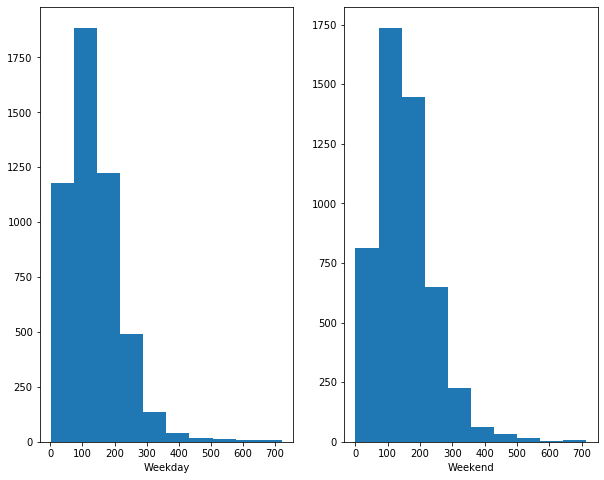

In [12]:
fig = plt.figure(figsize=(10,8))
fig.add_subplot(1,2,1)
plt.hist(length_of_stay_weekday)
plt.xlabel("Weekday")
fig.add_subplot(1,2,2)
plt.hist(length_of_stay_weekend)
plt.xlabel("Weekend")


In [13]:
## Q-Q Plots
import pylab
import scipy.stats as stats

###### Q-Q plot of Weekday

((array([-3.63568806, -3.40036853, -3.27067228, ...,  3.27067228,
          3.40036853,  3.63568806]),
  array([  2,   3,   3, ..., 677, 697, 722], dtype=int64)),
 (79.88305439397668, 135.982, 0.9517946788334408))

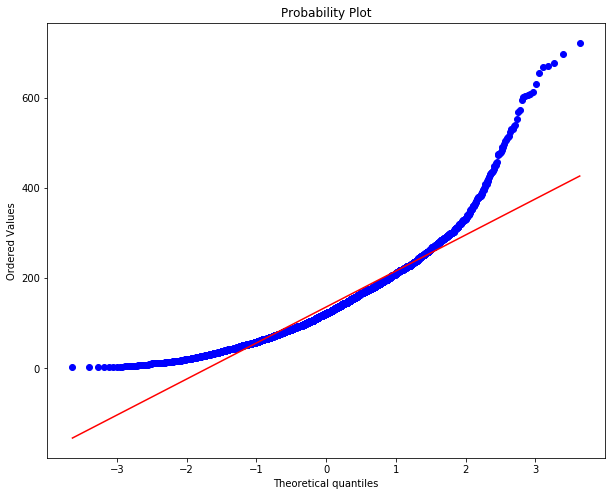

In [14]:
plt.figure(figsize=(10,8))
stats.probplot(length_of_stay_weekday,dist="norm",plot=pylab)

As we can see, the Weekday data is not normally distributed

###### Q-Q plot of Weekday

((array([-3.63543018, -3.400095  , -3.27038932, ...,  3.27038932,
          3.400095  ,  3.63543018]),
  array([  1,   1,   2, ..., 712, 713, 713], dtype=int64)),
 (84.34337002966842, 153.76236236236235, 0.960867054021755))

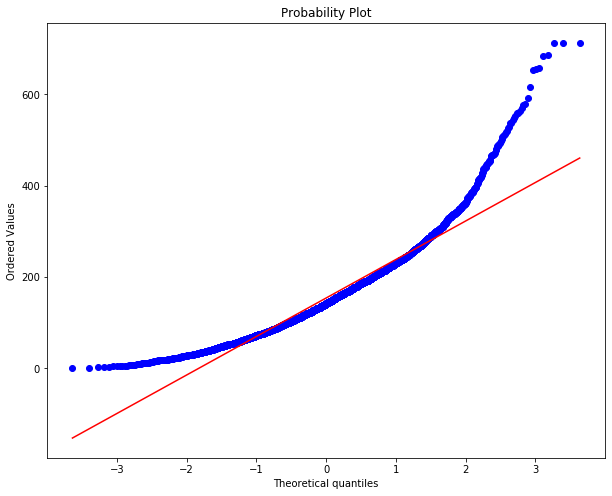

In [15]:
plt.figure(figsize=(10,8))
stats.probplot(length_of_stay_weekend,dist="norm",plot=pylab)

As we can see, the Weekday data is not normally distributed

#### Q3 Between normal and Weibull distribution, which distribution should be used to represent the random variable length of stay?

As, the variable matches the Weibull plot, the same should be used.

#### Q4. CPS Charges for weekends are more than the weekdays. One of the main reasons for higher parking fee during weekends is that the customers tend to stay for longer duration resulting in non-availability of parking lots. Is there any evidence to support the same?

Text(0.5, 0, 'Weekend')

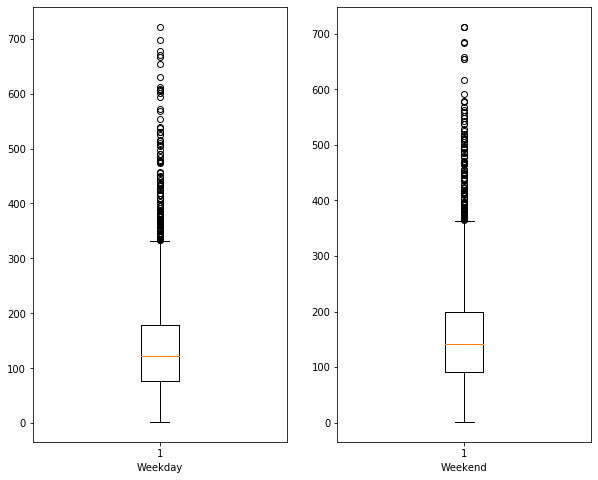

In [16]:
fig = plt.figure(figsize=(10,8))
fig.add_subplot(1,2,1)
plt.boxplot(length_of_stay_weekday)
plt.xlabel("Weekday")
fig.add_subplot(1,2,2)
plt.boxplot(length_of_stay_weekend)
plt.xlabel("Weekend")


In [17]:
print(" The average time on Weekend is {}".format(length_of_stay_weekend.mean()))
print(" The average time on Weekday is {}".format(length_of_stay_weekday.mean()))

 The average time on Weekend is 153.76236236236235
 The average time on Weekday is 135.982


Hypothesis test

**H0 : The mean of stay in Weekdays is equal to the mean of stay on weekends** 
**H1 : The mean of stay on weekends > the mean of stay on weekdays**

In [18]:
## T - test

In [19]:
length_of_stay_weekday.std()

83.88126661762958

In [20]:
length_of_stay_weekend.std()

87.72856402540724

In [21]:
stats.ttest_ind(length_of_stay_weekday,length_of_stay_weekend,equal_var=False)

Ttest_indResult(statistic=-10.355612943969952, pvalue=5.282576326886505e-25)

As, the p-values is less than 0.05, we can reject the null hypothesis and accept the alternate hypothesis

#### Q5 If we divide the day into three time periods , 10am to 2pm as Morning , 2 pm to 6 pm as Afternoon, and 6pm to 10 pm as Evening, then determine if the average length varies between these time periods

In [22]:
df_weekend.head()

,Vehicle,Equipment,DateIn,Unnamed: 3,DateOut,Unnamed: 5,Amount,TimeDiff,Ticket_Type,Weekday
0,1,6,2009-07-04,10:39:00,2009-07-04,14:13:00,70,214,Ticket,Saturday
1,1,5,2009-07-04,11:00:00,2009-07-04,12:47:00,50,107,Ticket,Saturday
2,1,6,2009-07-04,12:08:00,2009-07-04,13:58:00,0,110,Pass,Saturday
3,1,6,2009-07-04,12:56:00,2009-07-04,16:58:00,90,242,Ticket,Saturday
4,1,5,2009-07-04,13:57:00,2009-07-04,16:04:00,50,127,Ticket,Saturday


In [23]:
df_weekday["hour_of_day"]=df_weekday["Unnamed: 3"].apply(lambda x : x.hour)

In [24]:
df_weekend["hour_of_day"]=df_weekend["Unnamed: 3"].apply(lambda x : x.hour)

In [25]:
### define a function

def time_period(time):
    
    if (time>=10 and time<14):
        return "Morning"
    elif (time>=14 and time<18):
        return "Afternoon"
    elif (time >=18 and time <22):
        return "Evening"

In [26]:
df_weekday["time_period"]=df_weekday["hour_of_day"].apply(lambda x : time_period(x))

In [27]:
df_weekend["time_period"]=df_weekend["hour_of_day"].apply(lambda x : time_period(x))

In [28]:
df_weekend["time_period"].value_counts()

Afternoon    1941
Evening      1622
Morning      1170
Name: time_period, dtype: int64

In [29]:
df_weekday["time_period"].value_counts()

Afternoon    1922
Evening      1568
Morning      1190
Name: time_period, dtype: int64

In [33]:
df_weekend.groupby("time_period").mean()["TimeDiff"]

time_period
Afternoon   152.51
Evening     139.42
Morning     172.24
Name: TimeDiff, dtype: float64

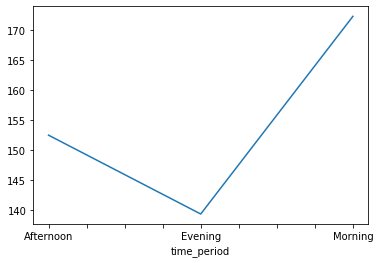

In [34]:
df_weekend.groupby("time_period").mean()["TimeDiff"].plot()

On weekends, the length of stay is higher than the others in Morning

Morning > Afternoon > Evening

In [40]:
df_weekday.groupby("time_period").mean()["TimeDiff"]

time_period
Afternoon   134.54
Evening     127.46
Morning     147.50
Name: TimeDiff, dtype: float64

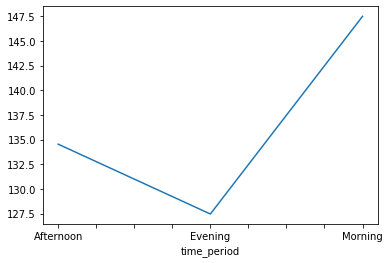

In [41]:
df_weekday.groupby("time_period").mean()["TimeDiff"].plot()

On weekdays, the length of stay is higher than the others in Morning

Morning > Afternoon > Evening

#### Q6. CPS charges its customers INR 30 for first 3 hours and INR 10 fir every additional hour on weekdays.What will be the financial impact to CPS if they charge INR 20 for the first 2 hours and INR 10 for every additional hour?What assumptions are made?

Initial : Rs 30 for 3 hours + Rs 10 / hour

New : Rs 20 for first 2 hours and INR 10 for additional hour

In [46]:
df_weekend["time_diff_hour"] = df_weekend['TimeDiff']/60

In [47]:
df_weekday["time_diff_hour"] = df_weekday["TimeDiff"]/60

In [50]:
def calculate_current_revenue(time):
    
    if time <=3:
        bill = 30 
    elif time >3:
        bill = 30 +((time-3)*10)
    return bill

In [55]:
def calculate_new_revenue(time):
    
    if time <= 2:
        bill =20
    elif time > 2 :
        bill = 20 +((time-2)*10)
    return bill

In [52]:
df_weekend["old_revenue"] = df_weekend["time_diff_hour"].apply(lambda x : calculate_current_revenue(x))

In [56]:
df_weekend["new_revenue"] = df_weekend["time_diff_hour"].apply(lambda x : calculate_new_revenue(x))

In [58]:
((df_weekend["new_revenue"].sum() - df_weekend["old_revenue"].sum())/df_weekend["old_revenue"].sum())*100

-15.87522575648745

with the new pricing scheme, the weekend revenue will decrease 15%

In [59]:
df_weekday["old_revenue"] = df_weekday["time_diff_hour"].apply(lambda x : calculate_current_revenue(x))

In [60]:
df_weekday["new_revenue"] = df_weekday["time_diff_hour"].apply(lambda x : calculate_new_revenue(x))

In [61]:
((df_weekday["new_revenue"].sum() - df_weekday["old_revenue"].sum())/df_weekday["old_revenue"].sum())*100

-19.115792853231234

with the new pricing scheme, the weekeday revenue will decrease 19%


### Chi square test on weekend revenue

In [62]:
old_rev_weekend = df_weekend["old_revenue"].values
new_rev_weekend = df_weekend["new_revenue"].values

In [63]:
stats.chisquare(old_rev_weekend,new_rev_weekend)

Power_divergenceResult(statistic=12036.703326298491, pvalue=0.0)

In [64]:
# The p value suggest there is statistical significant difference between the two values

### Chi square test on weekday revenue

In [65]:
old_rev_weekday = df_weekday["old_revenue"].values
new_rev_weekday = df_weekday["new_revenue"].values

In [66]:
stats.chisquare(old_rev_weekday,new_rev_weekday)

Power_divergenceResult(statistic=14385.348503082456, pvalue=0.0)

In [67]:
# The p value suggest there is statistical significant difference between the two values

### Q7. According to Poornima, The average occupancy time on a weekday is utmost 2 hours, but the analysts calculations on data showed otherwise. She was still not assured and asked analysts to check again.Conduct A hypothesis test to confirm the same

In [79]:
weekday_occupancy = df_weekday["time_diff_hour"].values

H0 : Mean of weekday occupancy > 2 hours
H1 : Mean of weekday occupancy <= 2 hours

In [80]:
stats.ttest_1samp(weekday_occupancy,2.0)

Ttest_1sampResult(statistic=13.472591715190216, pvalue=1.1534412415096488e-40)

### Thus, null hypothesis is rejected and poornima is right. As p value is less than 0.05